# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Boston Housing data set.

## Objectives

You will be able to:
- Understand what interactions are
- Understand how to accommodate for interactions in regression

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the Boston data set using `load_boston()`. We won't bother to preprocess the data in this lab. If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [3]:
regression = LinearRegression()
boston = load_boston()

Create a baseline model which includes all the variables in the Boston housing data set to predict the house prices. The use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [4]:
# Make dataframes
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)


In [5]:
boston_features.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [6]:
## code heres
np.random.seed(1111)

X_train, X_test, y_train, y_test = train_test_split(boston_features, boston.target)

In [7]:
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.6848638501866563

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the R^2. We'll look at the 3 interactions which have the biggest effect on our R^2, so print out the top 3 combinations.

You will create a for loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

In [8]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

In [9]:
## code to find top 3 interactions by R^2 value here

# List to store results
results = []

# Loop through combinations
for combo in combinations:
    #print(combo)
    
    # Init dictionary to store this model's results
    this_result = {}
    
    # Model this combination
    lr = LinearRegression()
    lr.fit(X_train[list(combo)],y_train)
    this_result['combo'] = combo
    this_result['r_squared'] = lr.score(X_test[list(combo)], y_test)

    #store results
    results.append(this_result)
    

In [10]:
results[:10]

[{'combo': ('CRIM', 'ZN'), 'r_squared': 0.1101115387382583},
 {'combo': ('CRIM', 'INDUS'), 'r_squared': 0.17634369178172293},
 {'combo': ('CRIM', 'CHAS'), 'r_squared': 0.1774081318732822},
 {'combo': ('CRIM', 'NOX'), 'r_squared': 0.18926980299159946},
 {'combo': ('CRIM', 'RM'), 'r_squared': 0.5802577505187938},
 {'combo': ('CRIM', 'AGE'), 'r_squared': 0.18535032818936814},
 {'combo': ('CRIM', 'DIS'), 'r_squared': 0.13224322043398662},
 {'combo': ('CRIM', 'RAD'), 'r_squared': 0.11904581248462953},
 {'combo': ('CRIM', 'TAX'), 'r_squared': 0.12742472479493983},
 {'combo': ('CRIM', 'PTRATIO'), 'r_squared': 0.24477898178180768}]

In [11]:
# Pass into df for easier sorting
results_df = pd.DataFrame.from_dict(results, orient='columns')

In [12]:
# Top Threeeeeeeee
results_df.sort_values('r_squared', ascending=False).head(3)

,combo,r_squared
56,"(RM, LSTAT)",0.613454
4,"(CRIM, RM)",0.580258
53,"(RM, TAX)",0.577078


## Look at the top 3 interactions: "RM" as a confounding factor

The top three interactions seem to involve "RM", the number of rooms as a confounding variable for all of them. Let's have a look at interaction plots for all three of them. This exercise will involve:

- splitting our data up in 3 groups: one for houses with a few rooms, one for houses with a "medium" amount of rooms, one for a high amount of rooms.
- Create a function `build_interaction_rm`. This function takes an argument `varname` (which can be set equal to the column name as a string) and a column `description` (which describes the variable or varname, to be included on the x-axis of the plot). The function outputs a plot that uses "RM" as a confounding factor. 

We split the data set for high, medium and low amount of rooms for you.

In [13]:
#rm = np.asarray(df[["RM"]]).reshape(len(df[["RM"]]))
rm = np.asarray(boston_features[["RM"]]).reshape(len(boston_features[["RM"]]))

In [14]:
all_data = pd.concat([boston_features,pd.DataFrame(boston.target)], axis=1)

In [15]:
all_data.rename(columns={0:'target'}, inplace=True)

In [16]:
high_rm = all_data[rm > np.percentile(rm, 67)]
med_rm = all_data[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = all_data[rm <= np.percentile(rm, 33)]

Create `build_interaction_rm`.

In [17]:
high_rm.shape

(167, 14)

In [18]:
med_rm.shape

(171, 14)

In [19]:
med_rm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [20]:
reggy = LinearRegression()

reggy.fit(high_rm['CRIM'].values.reshape(-1,1), high_rm["target"])
reggy.fit(high_rm.loc[:,['CRIM']], high_rm["target"])
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
def build_interaction_rm(varname, description):
    # Initialize
    reg_l = LinearRegression()
    reg_m = LinearRegression()
    reg_h = LinearRegression()
    
    # fits
    reg_l.fit(low_rm.loc[:,[varname]], low_rm["target"])
    reg_m.fit(med_rm.loc[:,[varname]], med_rm["target"])
    reg_h.fit(high_rm.loc[:,[varname]], high_rm["target"])
 
    # Preds
    preds_l = reg_l.predict(low_rm.loc[:,[varname]])
    preds_m = reg_m.predict(med_rm.loc[:,[varname]])
    preds_h = reg_h.predict(high_rm.loc[:,[varname]])

    # plots
    plt.scatter(low_rm.loc[:,[varname]], low_rm['target'])
    plt.plot(low_rm.loc[:,[varname]], preds_l)
    plt.scatter(med_rm.loc[:,[varname]], med_rm['target'])
    plt.plot(med_rm.loc[:,[varname]], preds_m)
    plt.scatter(high_rm.loc[:,[varname]], high_rm['target'])
    plt.plot(high_rm.loc[:,[varname]], preds_h)

    
    plt.show()

    return

Next, use build_interaction_rm with the three variables that came out with the highest effect on $R^2$

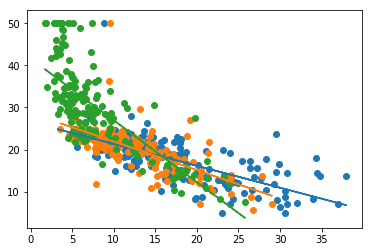

In [22]:
# first plot
build_interaction_rm('LSTAT', 'I do not know')

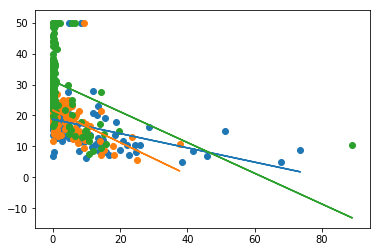

In [23]:
# second plot
build_interaction_rm('CRIM', 'I do not know')

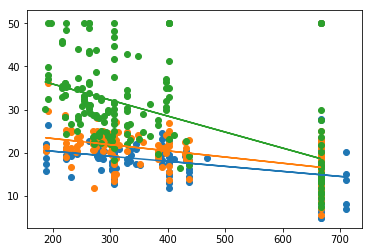

In [24]:
# third plot
build_interaction_rm('TAX', 'I do not know')

## Build a final model including all three interactions at once

Use 10-fold crossvalidation.

In [29]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [30]:
# code here
reggy = LinearRegression()

cv = KFold(n_splits=5, shuffle=True, random_state=1)

X_tr_int = X_train.copy()
X_tr_int["RM_CRIM"] = X_train["RM"] * X_train["CRIM"]
X_tr_int["RM_LSTAT"] = X_train["RM"] * X_train["LSTAT"]
X_tr_int["RM_TAX"] = X_train["RM"] * X_train["TAX"]

score_after_interacts = np.mean(cross_val_score(regression, X_tr_int, y_train, scoring="r2", cv=cv))
score_after_interacts 


0.7823599192833639

Our $R^2$ has increased considerably! Let's have a look in statsmodels to see if all these interactions are significant.

In [32]:
import statsmodels.api as sm
x_tr_int_sm = sm.add_constant(X_tr_int)
model_sm = sm.OLS(y_train, x_tr_int_sm)
res_model_sm = model_sm.fit()

res_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     81.88
Date:                Fri, 03 May 2019   Prob (F-statistic):           1.32e-99
Time:                        21:54:20   Log-Likelihood:                -1144.5
No. Observations:                 379   AIC:                             2317.
Df Residuals:                     365   BIC:                             2372.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.0477      6.102      6.891      0.000      30.048      54.048
CRIM          -0.1029      0.040     -2.593      0.010      -0.181      -0.025
ZN             0.0621      0.017      3.730      0.000       0.029       0.095
INDUS          0.0587      0.076      0.777      0.438      -0.090       0.207
CHAS           2.4760      1.075      2.304      0.022       0.363       4.589
NOX          -21.3096      4.711     -4.523      0.000     -30.575     -12.045
RM             3.6533      0.485      7.533      0.000       2.700       4.607
AGE            0.0059      0.016      0.364      0.716      -0.026       0.038
DIS           -1.6446      0.241     -6.813      0.000      -2.119      -1.170
RAD            0.3526      0.078      4.527      0.000       0.199       0.506
TAX           -0.0153      0.004     -3.467      0.001      -0.024      -0.007
PTRATIO       -1.0318      0.161     -6.406      0.000      -1.349      -0.715
B              0.0088      0.003      2.739      0.006       0.002       0.015
LSTAT         -0.5489      0.059     -9.259      0.000      -0.665      -0.432
==============================================================================
Omnibus:                      126.526   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.250
Skew:                           1.446   Prob(JB):                    3.83e-104
Kurtosis:                       7.668   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your conclusion here?

In [ ]:
# formulate your conclusion

Conclusion: Adding the interactions improved the model.

## Summary

You now understand how to include interaction effects in your model!